In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pymongo
#import pandas as pd
from pymongo import MongoClient
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
#tweets=pd.read_csv("final.csv",encoding = "ISO-8859-1")
#tweets.head()

In [2]:
connection = pymongo.MongoClient("localhost",27017)
db = connection["twtt"]
collection = db["tweets"]
print("connect to mongoDB")
tweets = pd.DataFrame(collection.find())
#df.to_csv('file1.csv')


connect to mongoDB


In [3]:
#tweets=pd.read_csv("file1.csv",encoding = "ISO-8859-1")

tweets.head()


_id  \
0  6005372e28cba40ce364d0bc   
1  6005372e28cba40ce364d0bd   
2  6005372e28cba40ce364d0be   
3  6005372e28cba40ce364d0bf   
4  6005372e28cba40ce364d0c0   

                                                Text        date  \
0    Ajith Starrer Valimai Is Expected To Create ...  2021-01-14   
1                                      Powerful edit  2021-01-14   
2  watch it 👀\nplease like 👍, share and do subscr...  2021-01-14   
3  Cigarette scene Is  starrer KGF 2 in trouble? ...  2021-01-14   
4                 Then how can this be possible...\n  2021-01-14   

            Location  User_followers  favourites_count  retweet_count  \
0            Twitter              91              4154              0   
1  Aurangabad, India             803             12989              0   
2   Bengaluru, India              25                67              0   
3      Mumbai, India           10124              9125              0   
4            unknown            1404             17010              0   

   Verified User  
0          False  
1          False  
2          False  
3          False  
4          False

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.Text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.Text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.Text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.Text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()


_id  \
0  6005372e28cba40ce364d0bc   
1  6005372e28cba40ce364d0bd   
2  6005372e28cba40ce364d0be   
3  6005372e28cba40ce364d0bf   
4  6005372e28cba40ce364d0c0   

                                                Text        date  \
0    Ajith Starrer Valimai Is Expected To Create ...  2021-01-14   
1                                      Powerful edit  2021-01-14   
2  watch it 👀\nplease like 👍, share and do subscr...  2021-01-14   
3  Cigarette scene Is  starrer KGF 2 in trouble? ...  2021-01-14   
4                 Then how can this be possible...\n  2021-01-14   

            Location  User_followers  favourites_count  retweet_count  \
0            Twitter              91              4154              0   
1  Aurangabad, India             803             12989              0   
2   Bengaluru, India              25                67              0   
3      Mumbai, India           10124              9125              0   
4            unknown            1404             17010              0   

   Verified User  sentiment_compound_polarity  sentiment_neutral  \
0          False                       0.8807              0.603   
1          False                       0.4215              0.263   
2          False                       0.8542              0.556   
3          False                      -0.4019              0.803   
4          False                       0.0000              1.000   

   sentiment_negative  sentiment_pos sentiment_type  
0               0.000          0.397       POSITIVE  
1               0.000          0.737       POSITIVE  
2               0.000          0.444       POSITIVE  
3               0.197          0.000       NEGATIVE  
4               0.000          0.000        NEUTRAL

In [5]:
#tweets.save

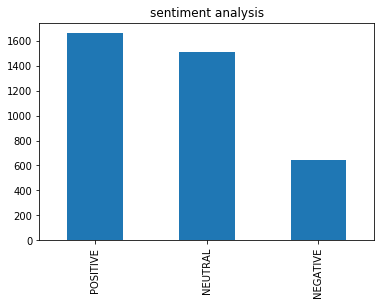

In [6]:
tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [7]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('stopwords')

def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lucifer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
normalizer("Here is text about an airline I like.")

['text', 'airline', 'like']

In [9]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
tweets['normalized_tweet'] = tweets.Text.apply(normalizer)
tweets[['Text','normalized_tweet']].head()

C:\Users\Lucifer\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


Text  \
0    Ajith Starrer Valimai Is Expected To Create The Same Impact That Kgf Created All Over India.\n\nVinoth Is Super Confident. T…   
1    Powerful edit                                                                                                                   
2  watch it 👀\nplease like 👍, share and do subscribe for more videos YouTube Friends BestFriend KicchaSudeep KGF…                    
3  Cigarette scene Is  starrer KGF 2 in trouble? Follow Us on \n\n KGF2 KGF2cigarettescene…                                          
4   Then how can this be possible...\n                                                                                               

                                                                          normalized_tweet  
0  [valimai, expected, create, impact, kgf, created, india, vinoth, super, confident]       
1  []                                                                                       
2  [please, like, share, subscribe, video, youtube, friend, bestfriend, kicchasudeep, kgf]  
3  [starrer, kgf, trouble, follow, u, kgf, kgf, cigarettescene]                             
4  [possible]

In [10]:
tweets

_id  \
0     6005372e28cba40ce364d0bc   
1     6005372e28cba40ce364d0bd   
2     6005372e28cba40ce364d0be   
3     6005372e28cba40ce364d0bf   
4     6005372e28cba40ce364d0c0   
...                        ...   
3800  6005372e28cba40ce364df94   
3801  6005372e28cba40ce364df95   
3802  6005372e28cba40ce364df96   
3803  6005372e28cba40ce364df97   
3804  6005372e28cba40ce364df98   

                                                                                                                                 Text  \
0       Ajith Starrer Valimai Is Expected To Create The Same Impact That Kgf Created All Over India.\n\nVinoth Is Super Confident. T…   
1       Powerful edit                                                                                                                   
2     watch it 👀\nplease like 👍, share and do subscribe for more videos YouTube Friends BestFriend KicchaSudeep KGF…                    
3     Cigarette scene Is  starrer KGF 2 in trouble? Follow Us on \n\n KGF2 KGF2cigarettescene…                                          
4      Then how can this be possible...\n                                                                                               
...                                   ...                                                                                               
3800    Monday 10Am \nSomething posting Be Ready Guys\n🔥😊😊\nKGFChapter2 KGF \nYash                                                      
3801  OMG! 😱🤩 kgf2  Star Yash   🤩 and Baahubali  in ONE frame!!! 🔥🔥\n\nthevocalnews\n\nKGF star Yash joins Baahubali fame…              
3802    "When Pan Indian films like Master, KGF, Baahubali comes all state distributors will cooperate" \n\n"Even though this i…        
3803    BAHUBALI 2 trailer 11 cr views in 3 YEARS RRR 3.8 cr in 3 MONTHS  and KGF 2 14 cr in 3 DAYS.. OUCHH! This is a STOMACH PUNCH…   
3804    Frames of Prabhas and Rocking Star  at Salaar launch ❤️\n\nSalaarSagaBegins 💥\n\n  Y…                                           

            date           Location  User_followers  favourites_count  \
0     2021-01-14  Twitter            91              4154               
1     2021-01-14  Aurangabad, India  803             12989              
2     2021-01-14  Bengaluru, India   25              67                 
3     2021-01-14  Mumbai, India      10124           9125               
4     2021-01-14  unknown            1404            17010              
...          ...      ...             ...              ...              
3800  2021-01-16  unknown            19              4169               
3801  2021-01-16  unknown            3               1                  
3802  2021-01-16  unknown            117             30222              
3803  2021-01-16  unknown            0               11                 
3804  2021-01-16  unknown            223             75433              

      retweet_count  Verified User  sentiment_compound_polarity  \
0     0              False          0.8807                        
1     0              False          0.4215                        
2     0              False          0.8542                        
3     0              False         -0.4019                        
4     0              False          0.0000                        
...  ..                ...             ...                        
3800  0              False          0.3612                        
3801  0              False          0.0000                        
3802  0              False          0.3612                        
3803  0              False          0.0000                        
3804  0              False          0.0000                        

      sentiment_neutral  sentiment_negative  sentiment_pos sentiment_type  \
0     0.603              0.000               0.397          POSITIVE        
1     0.263              0.000               0.737          POSITIVE        
2     0.556              0.000               0.444          

In [11]:
from nltk import ngrams
def ngrams(input_list):
    #onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams
tweets['grams'] = tweets.normalized_tweet.apply(ngrams)
tweets[['grams']].head()

grams
0  [valimai expected, expected create, create impact, impact kgf, kgf created, created india, india vinoth, vinoth super, super confident, valimai expected create, expected create impact, create impact kgf, impact kgf created, kgf created india, created india vinoth, india vinoth super, vinoth super confident]                                           
1  []                                                                                                                                                                                                                                                                                                                                                             
2  [please like, like share, share subscribe, subscribe video, video youtube, youtube friend, friend bestfriend, bestfriend kicchasudeep, kicchasudeep kgf, please like share, like share subscribe, share subscribe video, subscribe video youtube, video youtube friend, youtube friend bestfriend, friend bestfriend kicchasudeep, bestfriend kicchasudeep kgf]
3  [starrer kgf, kgf trouble, trouble follow, follow u, u kgf, kgf kgf, kgf cigarettescene, starrer kgf trouble, kgf trouble follow, trouble follow u, follow u kgf, u kgf kgf, kgf kgf cigarettescene]                                                                                                                                                           
4  []

In [12]:
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [14]:
import numpy as np
tweets[(tweets.sentiment_type == 'NEGATIVE')][['grams']].apply(count_words)['grams'].most_common(20)

[('rocking star', 280),
 ('star yash', 278),
 ('kgf rocking', 277),
 ('yash rebel', 277),
 ('rebel star', 277),
 ('star prabhas', 277),
 ('prabhas movie', 277),
 ('movie launch', 277),
 ('launch salaar', 277),
 ('salaar salaar', 277),
 ('salaar prabhas', 277),
 ('kgf rocking star', 277),
 ('rocking star yash', 277),
 ('star yash rebel', 277),
 ('yash rebel star', 277),
 ('rebel star prabhas', 277),
 ('star prabhas movie', 277),
 ('prabhas movie launch', 277),
 ('movie launch salaar', 277),
 ('launch salaar salaar', 277)]

In [16]:
tweets[(tweets.sentiment_type == 'POSITIVE')][['grams']].apply(count_words)['grams'].most_common(20)

[('prabhas salaarlaunch', 492),
 ('yash arrives', 470),
 ('fame yash', 455),
 ('arrives hyderabad', 454),
 ('hyderabad attend', 454),
 ('attend prabhas', 454),
 ('salaarlaunch event', 454),
 ('event salaar', 454),
 ('salaar salaarsagabegins', 454),
 ('fame yash arrives', 454),
 ('yash arrives hyderabad', 454),
 ('arrives hyderabad attend', 454),
 ('hyderabad attend prabhas', 454),
 ('attend prabhas salaarlaunch', 454),
 ('prabhas salaarlaunch event', 454),
 ('salaarlaunch event salaar', 454),
 ('event salaar salaarsagabegins', 454),
 ('salaarsagabegins salaarlaun', 452),
 ('salaar salaarsagabegins salaarlaun', 452),
 ('biggest franchise', 234)]

In [17]:
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))

In [18]:
vectorized_data = count_vectorizer.fit_transform(tweets.Text)
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))

In [19]:
def sentiment2target(sentiment):
    return {
        'NEGATIVE': 0,
        'NEUTRAL': 1,
        'POSITIVE' : 2
    }[sentiment]
targets = tweets.sentiment_type.apply(sentiment2target)

In [20]:
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.4, random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [21]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(data_train, targets_train)

In [22]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(data_train, targets_train)

In [24]:
clf.score(data_test, targets_test)

0.9572930354796321

In [25]:
sentences = count_vectorizer.transform([
    "What a great airline, the trip was a pleasure!",
    "My issue was quickly resolved after calling customer support. Thanks!",
    "What the hell! My flight was cancelled again. This sucks!",
    "Service was awful. I'll never fly with you again.",
    "You fuckers lost my luggage. Never again!",
    "I have mixed feelings about airlines. I don't know what I think.",
    ""
])
clf.predict_proba(sentences)

array([[0.00885728, 0.95757225, 0.03357047],
       [0.0051767 , 0.8884954 , 0.10632789],
       [0.0069424 , 0.84278514, 0.15027246],
       [0.02301093, 0.93901473, 0.03797434],
       [0.00534217, 0.79118646, 0.20347137],
       [0.00257463, 0.93573774, 0.06168763],
       [0.01065107, 0.97198998, 0.01735895]])

In [26]:
predictions_on_test_data = clf.predict_proba(data_test)
index = np.transpose(np.array([range(0,len(predictions_on_test_data))]))
indexed_predictions = np.concatenate((predictions_on_test_data, index), axis=1).tolist()

In [27]:
def marginal(p):
    top2 = p.argsort()[::-1]
    return abs(p[top2[0]]-p[top2[1]])
margin = sorted(list(map(lambda p : [marginal(np.array(p[0:3])),p[3]], indexed_predictions)), key=lambda p : p[0])
list(map(lambda p : tweets.iloc[data_test_index[int(p[1])].toarray()[0][0]].Text, margin[0:10]))

['  You gave your reaction to KGF 2 TEASER.\nPublic gave reaction to your reaction.😆😆😆😆😆😆\nDo you like it… ',
 '     Before KGF there is a ultra film like\nUshh\nUpendra \nA\nOm',
 '  Her Juicy Body and Sweet Pu$$y 💥 entrance to the heaven 💥💥💥\n\n. It must be so delicious, lickerish and tempting. 👅👅✊💦💦😍 ht…',
 '  Previous Old Teaser Records All Now Under The Name Of RockyBhai \n\nNot In KA\nNot in South India\nNot In Whole India\nRocky…',
 '   Credits is always given to  for sure\nBut framing as Only Ka… ',
 ' You need to step out of your comfort zone, stop being a KGF AndhBhakt he just expressed his opinion.',
 ' Those Are Real Time Views... We Are Posting Only Updated Views...\n\nFor Eg  KGF Chapter 2 Real Tim… ',
 ' Break record of kgf 2 poster 31 million tweets.india s biggest trend for poster.',
 '  Best screenplay movie anthe idhe. \nIlanti typical new kind screenplay nenu malli KGF daka chudaledu 🙏\n\n18YearsForClassicOk…',
 "KGF 2 Teaser to be Deleted From YouTube? Activists Sl

In [28]:
list(map(lambda p : predictions_on_test_data[int(p[1])], margin[0:10]))

[array([4.99184100e-01, 5.02752995e-08, 5.00815850e-01]),
 array([0.00444054, 0.48795138, 0.50760809]),
 array([0.02039394, 0.50072363, 0.47888243]),
 array([4.88728283e-01, 4.48288341e-05, 5.11226888e-01]),
 array([0.10390941, 0.46564994, 0.43044065]),
 array([0.10078174, 0.43193629, 0.46728196]),
 array([0.34463415, 0.39699031, 0.25837554]),
 array([0.01002509, 0.52132132, 0.46865359]),
 array([0.00847555, 0.52601983, 0.46550462]),
 array([5.50175593e-01, 3.00757181e-05, 4.49794331e-01])]

In [29]:
list(map(lambda p : tweets.iloc[data_test_index[int(p[1])].toarray()[0][0]].Text, margin[-10:]))

['  POWERFUL PEOPLE MAKE POWERFUL MOVIES\nSalaar\nKgf\nPrabhas   \nSalaarLaunch Tom…',
 '  POWERFUL PEOPLE MAKE POWERFUL MOVIES\nSalaar\nKgf\nPrabhas   \nSalaarLaunch Tom…',
 '  POWERFUL PEOPLE MAKE POWERFUL MOVIES\nSalaar\nKgf\nPrabhas   \nSalaarLaunch Tom…',
 '  POWERFUL PEOPLE MAKE POWERFUL MOVIES\nSalaar\nKgf\nPrabhas   \nSalaarLaunch Tom…',
 'KGF Chapter 2 Teaser | Yash | KGFchapter 2 Teaser 150 million views\n',
 'whole world enjoying KGF chapter 2 teaser\n\nBut this shit 💩finding physics in teaser  lowda rathee \n\nNe… ',
 '  whole world enjoying KGF chapter 2 teaser\n\nBut this shit 💩finding physics in teaser  lowda rathee \n\nNever m…',
 '  whole world enjoying KGF chapter 2 teaser\n\nBut this shit 💩finding physics in teaser  lowda rathee \n\nNever m…',
 '  whole world enjoying KGF chapter 2 teaser\n\nBut this shit 💩finding physics in teaser  lowda rathee \n\nNever m…',
 '  whole world enjoying KGF chapter 2 teaser\n\nBut this shit 💩finding physics in teaser  lowda rathee \n\n

In [30]:
list(map(lambda p : predictions_on_test_data[int(p[1])], margin[-10:]))

[array([0.00131593, 0.00130455, 0.99737952]),
 array([0.00131593, 0.00130455, 0.99737952]),
 array([0.00131593, 0.00130455, 0.99737952]),
 array([0.00131593, 0.00130455, 0.99737952]),
 array([9.98314238e-01, 2.60318672e-05, 1.65973043e-03]),
 array([9.98382511e-01, 2.77857649e-04, 1.33963144e-03]),
 array([9.98591482e-01, 3.65009267e-04, 1.04350844e-03]),
 array([9.98591482e-01, 3.65009267e-04, 1.04350844e-03]),
 array([9.98591482e-01, 3.65009267e-04, 1.04350844e-03]),
 array([9.98591482e-01, 3.65009267e-04, 1.04350844e-03])]

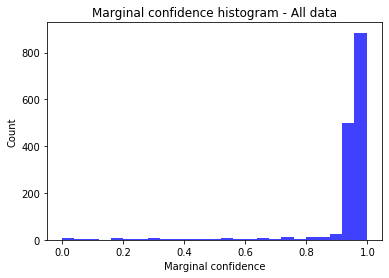

In [31]:
import matplotlib.pyplot as plt
marginal_probs = list(map(lambda p : p[0], margin))
n, bins, patches = plt.hist(marginal_probs, 25, facecolor='blue', alpha=0.75)
plt.title('Marginal confidence histogram - All data')
plt.ylabel('Count')
plt.xlabel('Marginal confidence')
plt.show()

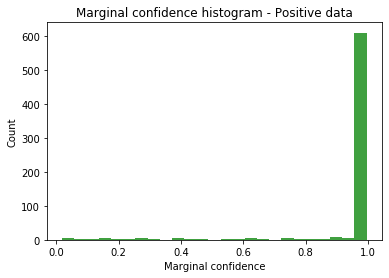

In [32]:
positive_test_data = list(filter(lambda row : row[0]==2, hstack((targets_test[:,None], data_test)).toarray()))
positive_probs = clf.predict_proba(list(map(lambda r : r[1:], positive_test_data)))
marginal_positive_probs = list(map(lambda p : marginal(p), positive_probs))
n, bins, patches = plt.hist(marginal_positive_probs, 25, facecolor='green', alpha=0.75)
plt.title('Marginal confidence histogram - Positive data')
plt.ylabel('Count')
plt.xlabel('Marginal confidence')
plt.show()

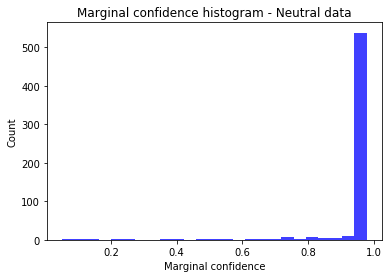

In [33]:
positive_test_data = list(filter(lambda row : row[0]==1, hstack((targets_test[:,None], data_test)).toarray()))
positive_probs = clf.predict_proba(list(map(lambda r : r[1:], positive_test_data)))
marginal_positive_probs = list(map(lambda p : marginal(p), positive_probs))
n, bins, patches = plt.hist(marginal_positive_probs, 25, facecolor='blue', alpha=0.75)
plt.title('Marginal confidence histogram - Neutral data')
plt.ylabel('Count')
plt.xlabel('Marginal confidence')
plt.show()

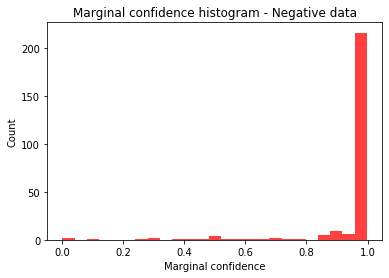

In [34]:
negative_test_data = list(filter(lambda row : row[0]==0, hstack((targets_test[:,None], data_test)).toarray()))
negative_probs = clf.predict_proba(list(map(lambda r : r[1:], negative_test_data)))
marginal_negative_probs = list(map(lambda p : marginal(p), negative_probs))
n, bins, patches = plt.hist(marginal_negative_probs, 25, facecolor='red', alpha=0.75)
plt.title('Marginal confidence histogram - Negative data')
plt.ylabel('Count')
plt.xlabel('Marginal confidence')
plt.show()